In [1]:
%run ./msgc_experiments_ct_init.ipynb

Populating the interactive namespace from numpy and matplotlib


In [2]:
im_ext = "eps"
# im_ext = "png"

In [3]:
import imma

# Data screenshots

Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM
C:\Users\Jirik\data\medical\orig\3Dircadb1.1\MASKS_DICOM\leftkidney
C:\Users\Jirik\data\medical\orig\ircad1b_seeds\ircadb1-01.pklz


Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


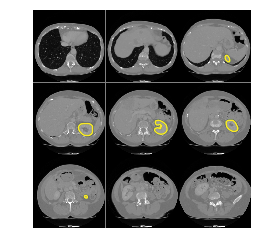

In [4]:

img, true_segmentation, seeds, voxelsize_mm, orig_vs_mm = prepare_data(1, "left_kidney")
# plt.figure(figsize=(10,15))
plt.figure()
import copy
imgview = copy.copy(img)
imgview[:,:,-1] = 0
imgview[:,-1,:] = 0
imgview[-1,:,:] = 0
# sed3.show_slices(imgview, contour=seg, seeds=seeds, show=False, slice_step=16.9, first_slice_offset_to_see_seed_with_label=2)
sed3.show_slices(imgview, 
                 contour=(true_segmentation > 0).astype(np.int) * 3, 
                 show=False, shape=[3,3], 
#                  first_slice_offset_to_see_seed_with_label=2
                )
plt.axis("off")
# plt.savefig("../graphics/msgc-ct-imgsample_separated.png")

plt.savefig(
    latex_dir / "ircadb01_slices_uncropped.png", 
    dpi=dpi, bbox_inches='tight')
plt.savefig(
    latex_dir / "ircadb01_slices_uncropped.eps", 
    dpi=dpi, bbox_inches='tight')

# Data processing graphs, statistics

In [5]:
df = pd.read_csv(fnamenew)
df.rename(columns={"msgc time": "MSGC time"})
# dfs = df[(df["data seedsz"]==3) & (df["data offset"] == 3) & (df["data radius"] == 10)]
# dfs_plus = dfs[dfs['data size'] > 160]

import seaborn as sns
sns.set_context("paper")
sns.set_style("white")

In [6]:
# temp fixutre

if "data orig voxesize mm 0" in df.keys():
    print("je to tam")
    df = df.rename(columns={
        "data orig voxesize mm 0": "data orig voxelsize mm 0",
        "data orig voxesize mm 1": "data orig voxelsize mm 1",
        "data orig voxesize mm 2": "data orig voxelsize mm 2",
        "data voxesize mm 0": "data voxelsize mm 0",
        "data voxesize mm 1": "data voxelsize mm 1",
        "data voxesize mm 2": "data voxelsize mm 2",
        "data voxesize mm^3": "data voxelsize mm^3",
              })

je to tam


In [7]:
df["relative object size"] = df["data target size px"] / df["data size px"]
df["relative object size [%]"] = 100 * df["data target size px"] / df["data size px"]
df["data orig size 0"] = df["data size 0"] * df["data voxelsize mm 0"]/df["data orig voxelsize mm 0"]
df["VOE [%]"] = df["error"] / df["data target size px"]

In [8]:
dfs = df
dfs.keys()

Index(['_create_nlinks time', 'avgd', 'block size', 'data id',
       'data organ key', 'data orig voxelsize mm 0',
       'data orig voxelsize mm 1', 'data orig voxelsize mm 2',
       'data segmentation size px', 'data size 0', 'data size 1',
       'data size 2', 'data size px', 'data target size px',
       'data voxelsize mm 0', 'data voxelsize mm 1', 'data voxelsize mm 2',
       'data voxelsize mm^3', 'dice', 'dice gc', 'edge number', 'err1_mm3',
       'err1_percent', 'err2_mm3', 'err2_percent', 'error',
       'experiment iteration start time', 'gc time', 'jaccard', 'jaccard gc',
       'low level image voxels', 'low level object voxels', 'machine hostname',
       'maxd', 'method', 'nlinks number', 'rmsd', 't graph 01', 't graph 10',
       't graph 11', 't graph 13', 't graph 14', 't graph high', 't graph low',
       't split 01', 't split 02', 't split 03', 't split 04', 't split 05',
       't split 06', 't split 07', 't split 08', 't split 081', 't split 082',
       't 

In [9]:
pd.set_option('display.max_columns', 500)
dfs

,_create_nlinks time,avgd,block size,data id,data organ key,data orig voxelsize mm 0,data orig voxelsize mm 1,data orig voxelsize mm 2,data segmentation size px,data size 0,data size 1,data size 2,data size px,data target size px,data voxelsize mm 0,data voxelsize mm 1,data voxelsize mm 2,data voxelsize mm^3,dice,dice gc,edge number,err1_mm3,err1_percent,err2_mm3,err2_percent,error,experiment iteration start time,gc time,jaccard,jaccard gc,low level image voxels,low level object voxels,machine hostname,maxd,method,nlinks number,rmsd,t graph 01,t graph 10,t graph 11,t graph 13,t graph 14,t graph high,t graph low,t split 01,t split 02,t split 03,t split 04,t split 05,t split 06,t split 07,t split 08,t split 081,t split 082,t split 0821,t split 09,t split 10,t1,t10,t2,t3,t3.1,t3.2,t3.3,t4,t5,t6,t7,t8,t9,time,tlinks number,vd,voe,voe gc,volume1_mm3,volume2_mm3,relative object size,relative object size [%],data orig size 0,VOE [%]
0,2.698244,2.307930,10,1,left_kidney,1.6,0.570,0.570,29609,138,195,195,5247450,43413,1.5,1.5,1.5,3.375,0.189094,NaN,20897955,6.750,0.005478,46595.250,37.813262,13808,1.559472e+09,24.595996,0.681953,NaN,NaN,NaN,genomnote4,13.747727,ssgc,15650505,10.266311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.749289,5247450,46.620960,31.804676,NaN,99930.375,146518.875,0.008273,0.827316,129.374998,0.318061
1,1.175025,1.854668,10,1,left_kidney,1.6,0.570,0.570,30919,138,195,195,5247450,43413,1.5,1.5,1.5,3.375,0.168084,0.049993,3028263,0.000,0.000000,42167.250,33.616746,12494,1.559472e+09,3.133238,0.712206,0.904774,5600.0,20.0,genomnote4,12.903488,msgc_hi2lo,2276742,7.849113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003505,24.027027,0.155903,0.162351,NaN,NaN,NaN,1.088386,2.307553,6.804336,9.119133,20.867005,20.893789,24.819139,751521,40.408810,28.779398,9.522611,104351.625,146518.875,0.008273,0.827316,129.374998,0.287794
2,0.002976,1.854668,10,1,left_kidney,1.6,0.570,0.570,30919,138,195,195,5247450,43413,1.5,1.5,1.5,3.375,0.168084,0.049993,3044650,0.000,0.000000,42167.250,33.616746,12494,1.559472e+09,2.818764,0.712206,0.904774,5600.0,22.0,genomnote4,12.903488,msgc_lo2hi,2289195,7.849113,0.050593,0.052577,0.054065,26.574730,26.740391,26.437762,0.075953,0.000496,0.015341,0.022252,0.051051,0.054026,0.108993,0.167053,9.667482,0.0,0.0,0.0,17.461370,25.424738,0.030713,32.303499,0.168642,0.171081,0.171081,0.226632,26.914447,26.914447,29.034354,29.437603,29.437603,NaN,29.484735,32.944820,755455,40.408810,28.779398,9.522611,104351.625,146518.875,0.008273,0.827316,129.374998,0.287794
3,7.767864,2.991992,10,5,left_kidney,1.6,0.782,0.782,43498,149,267,267,10622061,64610,1.5,1.5,1.5,3.375,0.195767,NaN,42337389,87.750,0.048100,71340.750,39.105339,21164,1.559472e+09,76.445437,0.672566,NaN,NaN,NaN,genomnote4,15.945219,ssgc,31715328,17.703387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.737358,10622061,48.535565,32.743363,NaN,146805.750,218058.750,0.006083,0.608262,139.687498,0.327565
4,2.395186,2.365609,10,5,left_kidney,1.6,0.782,0.782,45322,149,267,267,10622061,64610,1.5,1.5,1.5,3.375,0.175490,0.049403,3625628,6.750,0.003639,65103.750,35.094422,19292,1.559472e+09,3.543429,0.701418,0.905845,10935.0,26.0,genomnote4,15.945219,msgc_hi2lo,2725151,14.004058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,46.573639,0.292111,0.297567,NaN,NaN,NaN,2.115412,4.594917,13.907826,16.114039,42.984083,43.030210,47.859365,900477,42.557698,29.858231,9.415501,152961.750,218058.750,0.006083,0.608262,139.687498,0.298592
5,0.004464,2.365609,10,5,left_kidney,1.6,0.782,0.782,45322,149,267,267,10622061,64610,1.5,1.5,1.5,3.375,0.175490,0.049403,3303540,6.750,0.003639,65103.750,35.094422,19292,1.559472e+09,2.480003,0.701418,0.905845,10935.0,23.0,genomnote4,15.945219,msgc_lo2hi,2483469,14.004058,0.036209,0.

## Time requirements (graph construction + min-cut)

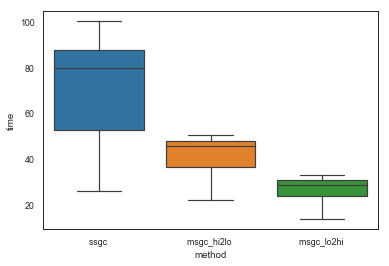

In [10]:
sns.boxplot(data=df, y="time", x="method")

## Time requirements (total = construction + min-cut)

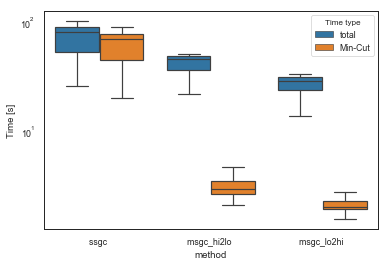

In [11]:
mfmc_label = "Min-Cut"
rename_bp = {"gc time": mfmc_label, "time": "total"}
uu = pd.melt(df.rename(columns=rename_bp), value_vars=[mfmc_label, "total"], id_vars=["method"], var_name="Time type", value_name="Time [s]")
bp = sns.boxplot(data=uu, hue="Time type",y="Time [s]", x="method", 
#                  showfliers=False, 
                 hue_order=["total", mfmc_label],
                )
# bp.set(xaxis="log")
bp.set(yscale="log")
plt.savefig(op.join(latex_dir, "msgc_time_boxplot_ct.pdf"), dpi=1000)
plt.savefig(op.join(latex_dir, "msgc_time_boxplot_ct.eps"), dpi=800)

In [12]:
# uu["method"] == "msgc_lo2hi"
uu[uu["method"] == "msgc_lo2hi "]


,method,Time type,Time [s]
2,msgc_lo2hi,Min-Cut,2.818764
5,msgc_lo2hi,Min-Cut,2.480003
8,msgc_lo2hi,Min-Cut,2.147149
11,msgc_lo2hi,Min-Cut,2.023156
14,msgc_lo2hi,Min-Cut,1.656101
17,msgc_lo2hi,Min-Cut,1.598118
20,msgc_lo2hi,Min-Cut,2.383239
23,msgc_lo2hi,Min-Cut,2.029677
26,msgc_lo2hi,Min-Cut,1.907481
29,msgc_lo2hi,Min-Cut,2.042529


In [20]:
dfsp = dfs.rename(columns=rename_bp)
table = pd.pivot_table(
    dfsp, values=['Min-Cut', 'total', "VOE [%]", "jaccard", "dice"], index=['method'], 
#     aggfunc=[min, np.mean, max],
    aggfunc={'Min-Cut': [min, np.mean, max] , 'total': [min, np.mean, max]  }
)

text = dtt.save(table, "pivot_table_time_ct", index=True)
print(text)
table

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{3}{l}{Min-Cut} & \multicolumn{3}{l}{total} \\
{} &        max &       mean &        min &         max &       mean &        min \\
method      &            &            &            &             &            &            \\
\midrule
msgc\_hi2lo  &   4.736311 &   3.153388 &   2.128834 &   50.101531 &  40.685013 &  21.865783 \\
msgc\_lo2hi  &   2.818764 &   2.108622 &   1.598118 &   32.944820 &  26.681292 &  13.644483 \\
ssgc        &  88.094727 &  59.465264 &  20.172845 &  100.232490 &  69.411109 &  25.579485 \\
\bottomrule
\end{tabular}



Min-Cut                             total                      
                   max       mean        min         max       mean        min
method                                                                        
msgc_hi2lo    4.736311   3.153388   2.128834   50.101531  40.685013  21.865783
msgc_lo2hi    2.818764   2.108622   1.598118   32.944820  26.681292  13.644483
ssgc         88.094727  59.465264  20.172845  100.232490  69.411109  25.579485

In [25]:
dfsp = dfs.rename(columns=rename_bp)
table = pd.pivot_table(
    dfsp, values=["VOE [%]", "jaccard", "dice", "rmsd", "maxd"], index=['method'], 
    aggfunc=np.mean
#     aggfunc=[np.mean, max],
#     aggfunc={'Min-Cut': [min, np.mean, max] , 'total': [min, np.mean, max], "VOE [%]":[min, max], "jaccard": max, "dice":max }
)
dtt.save(table, "pivot_table_error_ct", index=True)

table

,VOE [%],dice,jaccard,maxd,rmsd
method,,,,,
msgc_hi2lo,0.239119,0.137356,0.761269,13.538020,7.773676
msgc_lo2hi,0.237790,0.136628,0.762310,13.538020,7.718303
ssgc,0.256338,0.149030,0.743888,13.754503,10.010832


In [23]:
dfsp = dfs.rename(columns=rename_bp)
table = pd.pivot_table(
        dfsp, values=['Min-Cut', 'total', "VOE [%]", "jaccard", "dice"], index=['method'], 
#     aggfunc=[min, np.mean, max],
    aggfunc={'Min-Cut': [min, np.mean, max] , 'total': [min, np.mean, max], "VOE [%]": np.mean , "jaccard": np.mean}
#     aggfunc={'Min-Cut': [min, np.mean, max] , 'total': [min, np.mean, max], "VOE [%]":[min, max], "jaccard": max, "dice":max }
)
# dtt.save(table, "pivot_table_combination_ct")
table

SyntaxError: invalid syntax (<ipython-input-23-f0179b639eaa>, line 6)

In [76]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t3", "t4", "t5", "t6", "t7", "t8"], index=['method'], 
    aggfunc={'gc time': np.mean, 'time': [np.mean, min, max], "t3": np.mean,"t4": np.mean, "t5": np.mean, "t6": np.mean, "t7": np.mean, "t8": np.mean}
)
table

gc time        t3         t4         t5         t6         t7  \
                  mean      mean       mean       mean       mean       mean   
method                                                                         
msgc_hi2lo    3.153388  0.264475   1.944191   4.139444  12.256542  14.414593   
msgc_lo2hi    2.108622  0.303001  19.600569  22.790854  23.378279  23.378279   
ssgc         59.465264       NaN        NaN        NaN        NaN        NaN   

                   t8        time                        
                 mean         max       mean        min  
method                                                   
msgc_hi2lo   36.30446   50.101531  40.685013  21.865783  
msgc_lo2hi        NaN   32.944820  26.681292  13.644483  
ssgc              NaN  100.232490  69.411109  25.579485

In [77]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t2", "t3", "t3.1", "t3.2", "t3.3", "t4", "t5", "t6", "t7", "t8", "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.min
)
table

,gc time,low level image voxels,low level object voxels,t2,t3,t3.1,t3.2,t3.3,t4,t5,t6,t7,t8,time
method,,,,,,,,,,,,,,
msgc_hi2lo,2.128834,5600.0,15.0,0.143840,0.146816,NaN,NaN,NaN,1.017793,2.152148,6.137018,7.697938,19.120913,21.865783
msgc_lo2hi,1.598118,5600.0,14.0,0.165664,0.167648,0.167648,0.200383,9.441375,9.441375,11.085120,11.400114,11.400114,NaN,13.644483
ssgc,20.172845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.579485


In [78]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t graph 01", "t graph 10", "t graph 11", "t graph 13", "t graph 14", "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t graph 01,t graph 10,t graph 11,t graph 13,t graph 14,time
method,,,,,,,,,
msgc_hi2lo,3.153388,9847.6,25.2,NaN,NaN,NaN,NaN,NaN,40.685013
msgc_lo2hi,2.108622,9847.6,23.6,0.036902,0.038841,0.039537,19.137377,19.295093,26.681292
ssgc,59.465264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.411109


In [79]:
table = pd.pivot_table(
    dfs, values=[
        'gc time', 'time',  
        "t graph low",
        "t graph high",
        "t split 01",
        "t split 02",
        "t split 03",
        "t split 04",
        "t split 05",
        "t split 06",
        "t split 07",
        "t split 08",
        "t split 081",
        "t split 082",
        "t split 09",
        "t split 10",
        "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t graph high,t graph low,t split 01,t split 02,t split 03,t split 04,t split 05,t split 06,t split 07,t split 08,t split 081,t split 082,t split 09,t split 10,time
method,,,,,,,,,,,,,,,,,,
msgc_hi2lo,3.153388,9847.6,25.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685013
msgc_lo2hi,2.108622,9847.6,23.6,18.98297,0.109808,0.000302,0.004804,0.007981,0.03474,0.03686,0.079412,0.119202,7.297716,0.0,0.0,12.796613,18.20837,26.681292
ssgc,59.465264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.411109


In [80]:
dfs.keys()

Index(['_create_nlinks time', 'avgd', 'block size', 'data id',
       'data organ key', 'data orig voxelsize mm 0',
       'data orig voxelsize mm 1', 'data orig voxelsize mm 2',
       'data segmentation size px', 'data size 0', 'data size 1',
       'data size 2', 'data size px', 'data target size px',
       'data voxelsize mm 0', 'data voxelsize mm 1', 'data voxelsize mm 2',
       'data voxelsize mm^3', 'dice', 'dice gc', 'edge number', 'err1_mm3',
       'err1_percent', 'err2_mm3', 'err2_percent', 'error',
       'experiment iteration start time', 'gc time', 'jaccard', 'jaccard gc',
       'low level image voxels', 'low level object voxels', 'machine hostname',
       'maxd', 'method', 'nlinks number', 'rmsd', 't graph 01', 't graph 10',
       't graph 11', 't graph 13', 't graph 14', 't graph high', 't graph low',
       't split 01', 't split 02', 't split 03', 't split 04', 't split 05',
       't split 06', 't split 07', 't split 08', 't split 081', 't split 082',
       't 

# Dataset description

In [81]:
dfsu = dfs[["data id", "data orig voxelsize mm 0", "data orig voxelsize mm 1", "relative object size [%]", 'data size px', 'data target size px', "data orig size 0"]].drop_duplicates().describe()
dfsu

,data id,data orig voxelsize mm 0,data orig voxelsize mm 1,relative object size [%],data size px,data target size px,data orig size 0
count,10.000000,1.000000e+01,10.000000,10.000000,1.000000e+01,10.000000,10.000000
mean,6.000000,1.600000e+00,0.727200,0.540671,9.257598e+06,47907.100000,137.812498
std,3.399346,1.655023e-16,0.086632,0.142606,2.351502e+06,11199.675446,8.267973
min,1.000000,1.600000e+00,0.570000,0.357145,5.247450e+06,33524.000000,129.374998
25%,5.000000,1.600000e+00,0.720000,0.461818,8.532756e+06,41947.250000,132.187498
50%,6.000000,1.600000e+00,0.782000,0.495006,1.033690e+07,43879.500000,135.937498
75%,7.000000,1.600000e+00,0.782000,0.631213,1.062206e+07,50002.250000,139.687498
max,11.000000,1.600000e+00,0.782000,0.827316,1.154882e+07,69954.000000,151.874998


In [82]:
#  pivot_table(dfsu, values='D', index=[''],
# ...                     columns=['C'], aggfunc=np.sum)

In [83]:
help(dtt.save)

Help on function save in module data2tex:

save(data, filename, precision=4, scientific_notation=None, pure_latex=None, index=False)
    :param data:
    :param filename:
    :param precision: round precision
    :param scientific_notation: None or False (13141), True (1.3141*10^4) or "engineering" (13.141 *10^3)
    Format is done in LaTeX macro from siunitx package.
    :param pure_latex:
    The python implementation of scientific formating is used if this parameter is set True. Obsolete.
    :return:



In [84]:
df[["data orig size 0", "data size 0", "data orig voxelsize mm 0", "data voxelsize mm 0"]]

,data orig size 0,data size 0,data orig voxelsize mm 0,data voxelsize mm 0
0,129.374998,138,1.6,1.5
1,129.374998,138,1.6,1.5
2,129.374998,138,1.6,1.5
3,139.687498,149,1.6,1.5
4,139.687498,149,1.6,1.5
5,139.687498,149,1.6,1.5
6,135.937498,145,1.6,1.5
7,135.937498,145,1.6,1.5
8,135.937498,145,1.6,1.5
9,151.874998,162,1.6,1.5


In [85]:
dtt.save(dfs["data orig voxelsize mm 0"].min(), "data_ct_vxmm0_min")
dtt.save(dfs["data orig voxelsize mm 0"].max(), "data_ct_vxmm0_max")
dtt.save(dfs["data orig voxelsize mm 1"].min(), "data_ct_vxmm1_min")
dtt.save(dfs["data orig voxelsize mm 1"].max(), "data_ct_vxmm1_max")
dtt.save(dfs["data orig voxelsize mm 1"].count(), "data_ct_count")

dtt.save(dfs["relative object size [%]"].min(), "data_ct_relative_object_size_min")
dtt.save(dfs["relative object size [%]"].max(), "data_ct_relative_object_size_max")

dtt.save(int(dfs["data orig size 0"].min()), "data_ct_orig_sz0_min")
dtt.save(int(dfs["data orig size 0"].max()), "data_ct_orig_sz0_max")

dtt.save(working_voxelsize_mm[0], "data_ct_wvs_mm")

'1.3'

In [86]:
dfs["data orig size 0"].min()

129.37499807216227

In [104]:
rename_data = {
    "data orig voxelsize mm 0": "slice thickness [mm]", 
    "data orig voxelsize mm 1": "pixel spacing [mm]", 
    "gc time": mfmc_label + " [s]",
    "time" : "time [s]",
    "maxd" : "maxd [mm]",
    "rmsd": "RMSD"
    #"error": "error"
    
#     "voxelsize mm 0": "slice thickness [mm]", 
#     "data voxelsize mm 1": "pixel spacing [mm]", 
}
df_tex = df.rename(columns=rename_data)[[
    "data id", "slice thickness [mm]", "pixel spacing [mm]", mfmc_label + " [s]", "time [s]", "method",
    # "error",
                                "VOE [%]", "jaccard", "dice", "maxd [mm]", "RMSD"
]]
# df_tex 
dtt.save(df_tex, "data_ct_table")
df_tex

,data id,slice thickness [mm],pixel spacing [mm],Min-Cut [s],time [s],method,VOE [%],jaccard,dice,maxd [mm],RMSD
0,1,1.6,0.570,24.595996,29.749289,ssgc,0.318061,0.681953,0.189094,13.747727,10.266311
1,1,1.6,0.570,3.133238,24.819139,msgc_hi2lo,0.287794,0.712206,0.168084,12.903488,7.849113
2,1,1.6,0.570,2.818764,32.944820,msgc_lo2hi,0.287794,0.712206,0.168084,12.903488,7.849113
3,5,1.6,0.782,76.445437,88.737358,ssgc,0.327565,0.672566,0.195767,15.945219,17.703387
4,5,1.6,0.782,3.543429,47.859365,msgc_hi2lo,0.298592,0.701418,0.175490,15.945219,14.004058
5,5,1.6,0.782,2.480003,31.108671,msgc_lo2hi,0.298592,0.701418,0.175490,15.945219,14.004058
6,6,1.6,0.782,66.998272,76.799777,ssgc,0.316837,0.683293,0.188147,14.849242,10.866419
7,6,1.6,0.782,2.467602,41.044385,msgc_hi2lo,0.317679,0.685223,0.186786,14.150972,9.601575
8,6,1.6,0.782,2.147149,29.693601,msgc_lo2hi,0.304681,0.695325,0.179715,14.150972,9.048897
9,7,1.6,0.782,88.094727,100.232490,ssgc,0.185766,0.815192,0.101812,13.500000,5.571671


In [88]:
import os, platform, subprocess, re

def get_processor_name():
    if platform.system() == "Windows":
        return platform.processor()
    elif platform.system() == "Darwin":
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin'
        command ="sysctl -n machdep.cpu.brand_string"
        return subprocess.check_output(command).strip()
    elif platform.system() == "Linux":
        command = "cat /proc/cpuinfo"
        all_info = subprocess.check_output(command, shell=True).strip()
        for line in all_info.split("\n"):
            if "model name" in line:
                return re.sub( ".*model name.*:", "", line,1)
    return ""

In [89]:
get_processor_name()

'Intel64 Family 6 Model 142 Stepping 10, GenuineIntel'

In [90]:
# from psutil import virtual_memory
# virtual_memory()

# Statistics


In [91]:
dfs.keys()

Index(['_create_nlinks time', 'avgd', 'block size', 'data id',
       'data organ key', 'data orig voxelsize mm 0',
       'data orig voxelsize mm 1', 'data orig voxelsize mm 2',
       'data segmentation size px', 'data size 0', 'data size 1',
       'data size 2', 'data size px', 'data target size px',
       'data voxelsize mm 0', 'data voxelsize mm 1', 'data voxelsize mm 2',
       'data voxelsize mm^3', 'dice', 'dice gc', 'edge number', 'err1_mm3',
       'err1_percent', 'err2_mm3', 'err2_percent', 'error',
       'experiment iteration start time', 'gc time', 'jaccard', 'jaccard gc',
       'low level image voxels', 'low level object voxels', 'machine hostname',
       'maxd', 'method', 'nlinks number', 'rmsd', 't graph 01', 't graph 10',
       't graph 11', 't graph 13', 't graph 14', 't graph high', 't graph low',
       't split 01', 't split 02', 't split 03', 't split 04', 't split 05',
       't split 06', 't split 07', 't split 08', 't split 081', 't split 082',
       't 

In [92]:
from scipy import stats
dfs_plus = dfs
ssgc_rows = dfs_plus[dfs_plus["method"].str.contains(labels[0])]
ssgc_hi2lo_rows = dfs_plus[dfs_plus["method"].str.contains(labels[1])]
ssgc_lo2hi_rows = dfs_plus[dfs_plus["method"].str.contains(labels[2])]
pp0 = stats.ttest_rel(ssgc_rows["time"], ssgc_hi2lo_rows["time"])
pp1 = stats.ttest_rel(ssgc_rows["time"], ssgc_lo2hi_rows["time"])
pp2 = stats.ttest_rel(ssgc_hi2lo_rows["time"], ssgc_lo2hi_rows["time"])

print("pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok") 
#mozna staci i dvojnasobek hladiny vyzamnosi
print("statistic musi byt vetsi nez 0, pokud jde o jednostranný test. V tomto případě lze jen prohodit pořadí proměnných")
display(pp0)
display(pp1)
display(pp2)

float_to_latex_file(pp0.pvalue, op.join(latex_dir, "ttest_pvalue_ct_ssgc_msgc_hi2lo.tex"))
float_to_latex_file(pp1.pvalue, op.join(latex_dir, "ttest_pvalue_ct_ssgc_msgc_lo2hi.tex"))
float_to_latex_file(pp2.pvalue, op.join(latex_dir, "ttest_pvalue_ct_msgc_hi2lo_msgc_lo2hi.tex"))


pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok
statistic musi byt vetsi nez 0, pokud jde o jednostranný test. V tomto případě lze jen prohodit pořadí proměnných


Ttest_relResult(statistic=5.3753411496106427, pvalue=0.00044721825479295273)

Ttest_relResult(statistic=5.415846653756069, pvalue=0.00042413178146874405)

Ttest_relResult(statistic=4.4804636405304521, pvalue=0.0015313990732141599)

In [93]:
ssgc_rows

,_create_nlinks time,avgd,block size,data id,data organ key,data orig voxelsize mm 0,data orig voxelsize mm 1,data orig voxelsize mm 2,data segmentation size px,data size 0,data size 1,data size 2,data size px,data target size px,data voxelsize mm 0,data voxelsize mm 1,data voxelsize mm 2,data voxelsize mm^3,dice,dice gc,edge number,err1_mm3,err1_percent,err2_mm3,err2_percent,error,experiment iteration start time,gc time,jaccard,jaccard gc,low level image voxels,low level object voxels,machine hostname,maxd,method,nlinks number,rmsd,t graph 01,t graph 10,t graph 11,t graph 13,t graph 14,t graph high,t graph low,t split 01,t split 02,t split 03,t split 04,t split 05,t split 06,t split 07,t split 08,t split 081,t split 082,t split 0821,t split 09,t split 10,t1,t10,t2,t3,t3.1,t3.2,t3.3,t4,t5,t6,t7,t8,t9,time,tlinks number,vd,voe,voe gc,volume1_mm3,volume2_mm3,relative object size,relative object size [%],data orig size 0,VOE [%]
0,2.698244,2.307930,10,1,left_kidney,1.6,0.570,0.570,29609,138,195,195,5247450,43413,1.5,1.5,1.5,3.375,0.189094,NaN,20897955,6.750,0.005478,46595.250,37.813262,13808,1.559472e+09,24.595996,0.681953,NaN,NaN,NaN,genomnote4,13.747727,ssgc,15650505,10.266311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.749289,5247450,46.620960,31.804676,NaN,99930.375,146518.875,0.008273,0.827316,129.374998,0.318061
3,7.767864,2.991992,10,5,left_kidney,1.6,0.782,0.782,43498,149,267,267,10622061,64610,1.5,1.5,1.5,3.375,0.195767,NaN,42337389,87.750,0.048100,71340.750,39.105339,21164,1.559472e+09,76.445437,0.672566,NaN,NaN,NaN,genomnote4,15.945219,ssgc,31715328,17.703387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.737358,10622061,48.535565,32.743363,NaN,146805.750,218058.750,0.006083,0.608262,139.687498,0.327565
6,5.688588,2.328424,10,6,left_kidney,1.6,0.782,0.782,34940,145,267,267,10336905,51083,1.5,1.5,1.5,3.375,0.188147,NaN,41198901,70.875,0.048824,54553.500,37.580647,16185,1.559472e+09,66.998272,0.683293,NaN,NaN,NaN,genomnote4,14.849242,ssgc,30861996,10.866419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.799777,10336905,46.202061,31.670711,NaN,117922.500,172405.125,0.004942,0.494181,135.937498,0.316837
9,6.541257,1.265068,10,7,left_kidney,1.6,0.782,0.782,36568,162,267,267,11548818,44346,1.5,1.5,1.5,3.375,0.101812,NaN,46037475,776.250,0.568505,27027.000,19.793855,8238,1.559472e+09,88.094727,0.815192,NaN,NaN,NaN,genomnote4,13.500000,ssgc,34488657,5.571671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.232490,11548818,21.269963,18.480797,NaN,123417.000,149667.750,0.003840,0.383987,151.874998,0.185766
12,4.539396,1.309515,10,11,left_kidney,1.6,0.720,0.720,35999,141,246,246,8532756,41827,1.5,1.5,1.5,3.375,0.074936,NaN,34001136,6.750,0.005140,19676.250,14.982140,5832,1.559472e+09,55.125268,0.860575,NaN,NaN,NaN,genomnote4,12.278029,ssgc,25468380,5.685151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.353954,8532756,16.189339,13.942480,NaN,121496.625,141166.125,0.004902,0.490193,132.187498,0.139431
15,2.849182,1.992085,10,1,right_kidney,1.6,0.570,0.570,24903,138,195,195,5247450,33524,1.5,1.5,1.5,3.375,0.148099,NaN,20897955,54.000,0.054769,29149.875,29.565098,8653,1.559480e+09,20.172845,0.742010,NaN,NaN,NaN,genomnote4,15.000000,ssgc,15650505,9.970021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.579485,5247450,34.618319,25.799046,NaN,84047.625,113143.500,0.006389,0.638863,129.374998,0.258114
18,6.804137,3.052975,10,5,right_kidney,1.6,0.782,0.782,48117,149,267,267,10622061,69954,1.5,1.5,1.5,3.375,0.187455,NaN

In [116]:
# pp0 = stats.ttest_rel(ssgc_hi2lo_rows["time"], ssgc_rows["time"])
# pp1 = stats.ttest_rel(ssgc_lo2hi_rows["time"], ssgc_rows["time"])
# pp2 = stats.ttest_rel(ssgc_lo2hi_rows["time"], ssgc_hi2lo_rows["time"])
# pp_err0 = stats.ttest_rel(ssgc_lo2hi_rows["VOE [%]"], ssgc_rows["VOE [%]"])
# pp_err2 = stats.ttest_rel(ssgc_lo2hi_rows["VOE [%]"], ssgc_hi2lo_rows["VOE [%]"])
# stats.ttest_rel
# display(pp0)
# display(pp1)
# display(pp2)
# display(pp_err0)
# display(pp_err2)

Ttest_relResult(statistic=-5.3753411496106427, pvalue=0.00044721825479295273)

Ttest_relResult(statistic=-5.415846653756069, pvalue=0.00042413178146874405)

Ttest_relResult(statistic=-4.4804636405304521, pvalue=0.0015313990732141599)

Ttest_relResult(statistic=-5.2766115953555746, pvalue=0.00050938510064518284)

Ttest_relResult(statistic=-1.0253885631519559, pvalue=0.33194922378244029)